Descomentar el index con ``ctrl+/``

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='top1'></a>
# <center>75.06/95.58 Organización de Datos - TP 2

<div style="border-bottom:3px solid #000;">  -->

<!-- ## Index
  
<a href='#section1'>**Step 1:**</a>   Equipo    
<a href='#section2'>**Step 2:**</a>   Import de librerias  
<a href='#section3'>**Step 3:**</a>   Feature engineering  
<a href='#section4'>**Step 4:**</a>   NLP  
<a href='#section5'>**Step 5:**</a>   Modelos  
<a href='#section6'>**Step 6:**</a>   Scoring -->

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section1'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 1: Equipo</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

# Oh La La... Data!

* **Hamma AALI CHTOUKI** --- *Padrón 106607 - Alumno regular de intercambio.*  
* **Aymeryc COUSAERT** ------  *Padrón 105464 - Alumno regular de intercambio.*
* **Mariana VINYOLAS**  ---------  *Alumna oyente.*

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 2: Import de librerias </h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import texthero as hero

import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as catb

import scikitplot as skplt
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

C:\anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 3: Feature engineering</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [4]:
# limpiamos la columna text eliminando algunos caracteres y la guardamos en 'text_clean'
df = train
df['text'] = df['text'].str.lower()
df = df.drop(['id', 'location'], axis=1)

In [6]:
df.sample(8)

,keyword,text,target
5450,police,police kill gunman at nashville movie theatre ...,1
1929,curfew,it was past curfew\nand we were at the grove,0
1791,crash,make man pikin crash ??????,1
5698,rescued,three beached whales rescued in kerry - http:/...,1
4293,hellfire,hellfire! we donûªt even want to think about ...,0
2072,dead,if itûªs a war you came to see you will never...,0
6714,thunderstorm,#usnwsgov severe weather statement issued augu...,1
6037,seismic,still no plans? don't worry we got you covered...,0


#### Generamos nuevas features sobre el texto

In [7]:
# generamos una columna que indica la cantidad de links a  enlaces externos
df['link'] = df['text'].apply(lambda x: x.count('http'))

In [8]:
# generamos una columna que indica la cantidad de referencias a otras cuentas de twitter
df['contact'] = df['text'].apply(lambda x: x.count('@'))

In [9]:
# generamos una columna que indica la cantidad de hashtags
df['hashtag'] = df['text'].apply(lambda x: x.count('#'))

In [10]:
# generamos una columna que indica la cantidad de digitos
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [11]:
# calculamos la longitud del tweet andes de limpiar
df['length'] = df['text'].str.len()

In [12]:
# calculamos la cantidad de palabras antes de limpiar
def count_words(text):
    '''
    Funcion que toma un texto y devuelve la cantidad de palabras
    '''
    word_counts = len(text.split(' '))
    return word_counts

df['words'] = df['text'].apply(count_words)

In [14]:
# limpiamos el texto eliminando urls, cuentas, hashtags y numeros

def clean_str(string):
    string = re.sub(r'https?\://\S+', '', string)
    string = re.sub(r'http?\://\S+', '', string)
    string = re.sub(r'@\w*\s', '', string)
    string = re.sub(r'#\w*\s', '', string)
    string = re.sub(r'\d', '', string)
    return string

df['text_clean'] = df['text'].apply(lambda x: clean_str(str(x)))

In [19]:
df.sample(5)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean
1555,chemical%20emergency,@laevantine fortunately i reworked the plumbin...,0,0,1,0,0,135,22,fortunately i reworked the plumbing on my emer...
7123,violent%20storm,dramatic video shows plane landing during viol...,1,1,0,0,0,78,9,dramatic video shows plane landing during viol...
1585,cliff%20fall,i hope u trip n fall of a cliff after this twe...,0,1,0,0,0,72,13,i hope u trip n fall of a cliff after this tweet
2322,demolished,@david5fernandez @theblaze trump will get abso...,0,0,2,0,0,86,11,trump will get absolutely demolished in a gene...
2020,damage,lmao fuckboy changed his @ for damage control\...,0,0,2,0,0,58,8,lmao fuckboy changed his for damage control\n@...


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 4: NLP</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [20]:
# eliminamos stopwords

stop = stopwords.words('english')

df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
# eliminamos signos de puntuacion y caracteres especiales
df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')

In [22]:
df['word_tokenize'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [23]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [24]:
# unificamos palabras que poseen la misma raiz aplicando la funcion word_lematizer
df['word_lemmatizer'] = df['word_tokenize'].apply(lambda x: word_lemmatizer(x))

In [25]:
# unificamos la lista de tokens para poder analizar el texto limpio
df['text_clean'] = df['word_lemmatizer'].str.join(' ')

In [26]:
# calculamos nuevamente la longuitud, pero ahora del texto limpio                       
df['length-clean'] = df['text_clean'].str.len()

In [27]:
df['words_clean'] = df['text_clean'].apply(count_words)

In [29]:
pd.set_option('display.max_colwidth', 150)  

In [30]:
df[['text', 'text_clean']].sample(10)

,text,text_clean
5041,@mariankeyes rubber mudslide! still laughing!,rubber mudslide still laughing
4429,@susanj357 @msnbc @allinwithchris it's like watching a hostage video sometimes ... but not always ( at least not yet),like watching hostage video sometimes always least yet
7497,a staged locomotive wreck what could possibly go wrong? http://t.co/ei9x4h8thm,staged locomotive wreck could possibly go wrong
3464,#dating #meet #sex hot teen ass exploded by fat cock http://t.co/x39jwsyrqr,hot teen as exploded fat cock
3915,a [small] flood with bigåêconsequences https://t.co/cvpdvhxd1r http://t.co/fdmxp4fcmo,small flood bigåêconsequences
3655,i fail to see how that would not bring the number of road fatalities down immensely,fail see would bring number road fatality immensely
345,well done celtic fingers crossed for aberdeen tomorrow night! \narmageddon eh.... ??,well done celtic finger crossed aberdeen tomorrow night armageddon eh
1915,@keampurley thirst has no curfew,thirst curfew
3667,fatality!,fatality
3503,the gusto in persist had amongst empty-pated communication explosion: hpssjd,gusto persist amongst emptypated communication explosion hpssjd


In [31]:
df['keyword'] = df.keyword.str.replace('%20', '_')
df['keyword'] = df.keyword.str.lower()

In [39]:
df.sample(3)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean,word_tokenize,word_lemmatizer,length-clean,words_clean
3355,evacuated,good thing there was actually just a legit fire in the mall and nobody evacuated!!,1,0,0,0,0,82,15,good thing actually legit fire mall nobody evacuated,"[good, thing, actually, legit, fire, mall, nobody, evacuated]","[good, thing, actually, legit, fire, mall, nobody, evacuated]",52,8
4482,hostages,nigerian military rescue 178 hostages from boko haram - florida sentinel bulletin: florid... http://t.co/kctigymahl #security #terrorism,1,1,0,2,1,136,16,nigerian military rescue hostage boko haram florida sentinel bulletin florid terrorism,"[nigerian, military, rescue, hostages, boko, haram, florida, sentinel, bulletin, florid, terrorism]","[nigerian, military, rescue, hostage, boko, haram, florida, sentinel, bulletin, florid, terrorism]",86,11
1838,crashed,i just nearly crashed my car typing 'paul rudd attacked by flying ants' into notes on my phone.,0,0,0,0,0,95,18,nearly crashed car typing paul rudd attacked flying ant note phone,"[nearly, crashed, car, typing, paul, rudd, attacked, flying, ants, notes, phone]","[nearly, crashed, car, typing, paul, rudd, attacked, flying, ant, note, phone]",66,11


## Bag of Words

In [ ]:
# bow = CountVectorizer(max_features=1000, ngram_range=(1,1),analyzer = "word")

In [ ]:
# train_bow = bow.fit_transform(df['text'])                                                    #########  ESTA MAL #########

In [ ]:
# df_bow = pd.DataFrame(data = train_bow.todense(), columns = bow.get_feature_names())

## TF- IDF

In [32]:
tfidf = TfidfVectorizer(max_features=1500, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))


In [33]:
train_vect = tfidf.fit_transform(df['text_clean'])                                             

In [ ]:
type(train_vect)

In [34]:
df_tf_idf = pd.DataFrame(data = train_vect.todense(), columns = tfidf.get_feature_names())

In [35]:
df_tf_idf.shape

(7613, 1500)

In [ ]:
df_tf_idf['target'].value_counts()

In [36]:
df_tf_idf.head()

,aba,abandoned,abc,ablaze,able,absolutely,access,accident,according,account,...,york,young,youth,youtube,yr,zone,û_,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_tf_idf['target'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [38]:
# como existe la columna target en el analisis tf-idf, la modifico para hacer el concat con 'target' y que no se duplique
df_tf_idf['targ'] = df_tf_idf['target']
df_tf_idf = df_tf_idf.drop(['target'], axis=1)

Para no perder tantos registros, vamos a dejar de lado por ahora las columnas ``keyword``, ``location`` y ``text``. Tambien eliminamos ``id`` porque no aporta informacion al analisis

In [40]:
df = df.drop([ 'keyword', 'text', 'text_clean', 'word_tokenize', 'word_lemmatizer'], axis=1)

In [41]:
df['target'].value_counts()  # chequeamos si los labels estan balanceados

0    4342
1    3271
Name: target, dtype: int64

In [42]:
df_train = pd.concat([df, df_tf_idf], axis=1)  # revisar porque aparecen dos columnas llamadas target

In [43]:
df_train.shape

(7613, 1509)

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section5'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 5: Modelos</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

## Train Test Split

In [44]:
# separamos el target del resto de los features

y = df_train.target    
X = df_train.drop('target', axis=1)

In [45]:
X.shape, y.shape

((7613, 1508), (7613,))

In [46]:
# hacemos division entre train y test para cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)      

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5329, 1508), (2284, 1508), (5329,), (2284,))

In [48]:
# estandarizamos las features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test) 

In [49]:
# definimos una 
cv = StratifiedKFold(n_splits=5, random_state=27, shuffle=True)

## Random Forest

In [50]:
rf = RandomForestClassifier(max_depth= 4, random_state=27)
y_pred = rf.fit(X_train, y_train).predict(X_test)

In [51]:
rf.score(X_train, y_train), rf.score(X_test,y_test)

(0.6209420153875024, 0.6190893169877408)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1304
           1       1.00      0.11      0.20       980

    accuracy                           0.62      2284
   macro avg       0.80      0.56      0.48      2284
weighted avg       0.77      0.62      0.51      2284



In [53]:
param_grid = {'n_estimators': [50, 100, 200], 
              'max_features': [2, 3, 4], 
              'max_depth': [5, 10, 20], 
              'min_samples_leaf':[10, 20]}


In [54]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1, scoring='accuracy')

In [55]:
%%time
rf_grid_search.fit(X_train, y_train)  
display(rf_grid_search.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Wall time: 1min 41s


In [56]:
rf_grid_search.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 50}

In [57]:
pred_grid = rf_grid_search.predict(X_test)

In [58]:
rf_grid_search.score(X_train, y_train), rf_grid_search.score(X_test,y_test)

(0.570088196659786, 0.5709281961471103)

## XGBoost

In [61]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, random_state=27)

In [65]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [66]:
xgb_cv = RandomizedSearchCV(model_xgb, params, n_iter=25, verbose=True, scoring='accuracy', random_state=27)

In [67]:
%%time
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 11.7min finished


Wall time: 11min 48s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=27, reg_alpha=0,
                                           reg_lambda...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B3CEE94828>,
                                        'reg_a

In [68]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)

In [69]:
y_pred_xgb = xgb_cv.predict(X_test)

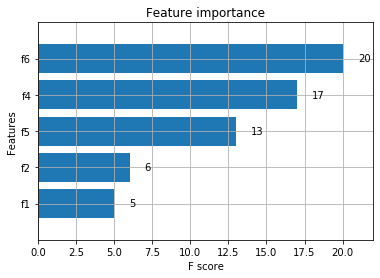

In [71]:
xgb.plot_importance(xgb_cv.best_estimator_, height=0.8, max_num_features=5);

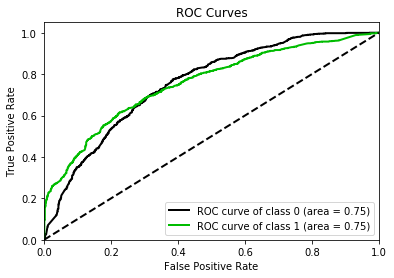

In [72]:
skplt.metrics.plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False);

In [70]:
xgb_cv.score(X_train, y_train), xgb_cv.score(X_test,y_test)

(0.7397260273972602, 0.7031523642732049)

In [86]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1304
           1       0.69      0.56      0.62       980

    accuracy                           0.70      2284
   macro avg       0.70      0.69      0.69      2284
weighted avg       0.70      0.70      0.70      2284



In [77]:
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7549803587079004


## CatBoost

In [74]:
model_cat = catb.CatBoostClassifier()

In [75]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.026901
0:	learn: 0.6899257	total: 214ms	remaining: 3m 33s
1:	learn: 0.6872060	total: 352ms	remaining: 2m 55s
2:	learn: 0.6841018	total: 476ms	remaining: 2m 38s
3:	learn: 0.6811722	total: 617ms	remaining: 2m 33s
4:	learn: 0.6786617	total: 748ms	remaining: 2m 28s
5:	learn: 0.6754396	total: 898ms	remaining: 2m 28s
6:	learn: 0.6731550	total: 1.08s	remaining: 2m 33s
7:	learn: 0.6708433	total: 1.22s	remaining: 2m 31s
8:	learn: 0.6680880	total: 1.35s	remaining: 2m 28s
9:	learn: 0.6659282	total: 1.5s	remaining: 2m 28s
10:	learn: 0.6634854	total: 1.64s	remaining: 2m 27s
11:	learn: 0.6614379	total: 1.79s	remaining: 2m 27s
12:	learn: 0.6600594	total: 1.94s	remaining: 2m 27s
13:	learn: 0.6585267	total: 2.07s	remaining: 2m 25s
14:	learn: 0.6565543	total: 2.2s	remaining: 2m 24s
15:	learn: 0.6548567	total: 2.35s	remaining: 2m 24s
16:	learn: 0.6534525	total: 2.47s	remaining: 2m 23s
17:	learn: 0.6521807	total: 2.62s	remaining: 2m 23s
18:	learn: 0.6505802	total: 2.78s	remaining: 2

158:	learn: 0.5634248	total: 23s	remaining: 2m 1s
159:	learn: 0.5630126	total: 23.2s	remaining: 2m 1s
160:	learn: 0.5626819	total: 23.3s	remaining: 2m 1s
161:	learn: 0.5622270	total: 23.5s	remaining: 2m 1s
162:	learn: 0.5619617	total: 23.6s	remaining: 2m 1s
163:	learn: 0.5616140	total: 23.7s	remaining: 2m 1s
164:	learn: 0.5612606	total: 23.9s	remaining: 2m
165:	learn: 0.5609089	total: 24s	remaining: 2m
166:	learn: 0.5606453	total: 24.2s	remaining: 2m
167:	learn: 0.5604836	total: 24.3s	remaining: 2m
168:	learn: 0.5601258	total: 24.5s	remaining: 2m
169:	learn: 0.5598166	total: 24.6s	remaining: 2m
170:	learn: 0.5596524	total: 24.7s	remaining: 1m 59s
171:	learn: 0.5594077	total: 24.9s	remaining: 1m 59s
172:	learn: 0.5590586	total: 25s	remaining: 1m 59s
173:	learn: 0.5588863	total: 25.2s	remaining: 1m 59s
174:	learn: 0.5584181	total: 25.3s	remaining: 1m 59s
175:	learn: 0.5580866	total: 25.4s	remaining: 1m 59s
176:	learn: 0.5576437	total: 25.6s	remaining: 1m 59s
177:	learn: 0.5573318	total: 

314:	learn: 0.5229250	total: 44.1s	remaining: 1m 35s
315:	learn: 0.5225921	total: 44.2s	remaining: 1m 35s
316:	learn: 0.5223429	total: 44.3s	remaining: 1m 35s
317:	learn: 0.5219020	total: 44.4s	remaining: 1m 35s
318:	learn: 0.5215881	total: 44.6s	remaining: 1m 35s
319:	learn: 0.5212481	total: 44.7s	remaining: 1m 35s
320:	learn: 0.5211824	total: 44.8s	remaining: 1m 34s
321:	learn: 0.5209798	total: 45s	remaining: 1m 34s
322:	learn: 0.5207231	total: 45.1s	remaining: 1m 34s
323:	learn: 0.5204641	total: 45.2s	remaining: 1m 34s
324:	learn: 0.5201908	total: 45.4s	remaining: 1m 34s
325:	learn: 0.5199878	total: 45.5s	remaining: 1m 34s
326:	learn: 0.5197865	total: 45.6s	remaining: 1m 33s
327:	learn: 0.5194913	total: 45.7s	remaining: 1m 33s
328:	learn: 0.5192096	total: 45.9s	remaining: 1m 33s
329:	learn: 0.5189740	total: 46s	remaining: 1m 33s
330:	learn: 0.5186248	total: 46.2s	remaining: 1m 33s
331:	learn: 0.5182998	total: 46.3s	remaining: 1m 33s
332:	learn: 0.5180113	total: 46.4s	remaining: 1m 3

470:	learn: 0.4857838	total: 1m 4s	remaining: 1m 12s
471:	learn: 0.4856540	total: 1m 4s	remaining: 1m 12s
472:	learn: 0.4852102	total: 1m 5s	remaining: 1m 12s
473:	learn: 0.4850102	total: 1m 5s	remaining: 1m 12s
474:	learn: 0.4847628	total: 1m 5s	remaining: 1m 12s
475:	learn: 0.4845451	total: 1m 5s	remaining: 1m 11s
476:	learn: 0.4842750	total: 1m 5s	remaining: 1m 11s
477:	learn: 0.4842291	total: 1m 5s	remaining: 1m 11s
478:	learn: 0.4840604	total: 1m 5s	remaining: 1m 11s
479:	learn: 0.4838135	total: 1m 5s	remaining: 1m 11s
480:	learn: 0.4835668	total: 1m 6s	remaining: 1m 11s
481:	learn: 0.4834112	total: 1m 6s	remaining: 1m 11s
482:	learn: 0.4831676	total: 1m 6s	remaining: 1m 10s
483:	learn: 0.4828707	total: 1m 6s	remaining: 1m 10s
484:	learn: 0.4826873	total: 1m 6s	remaining: 1m 10s
485:	learn: 0.4824513	total: 1m 6s	remaining: 1m 10s
486:	learn: 0.4822943	total: 1m 6s	remaining: 1m 10s
487:	learn: 0.4821353	total: 1m 6s	remaining: 1m 10s
488:	learn: 0.4819530	total: 1m 7s	remaining: 

626:	learn: 0.4591689	total: 1m 25s	remaining: 50.9s
627:	learn: 0.4590622	total: 1m 25s	remaining: 50.7s
628:	learn: 0.4589348	total: 1m 25s	remaining: 50.6s
629:	learn: 0.4588889	total: 1m 25s	remaining: 50.4s
630:	learn: 0.4587786	total: 1m 26s	remaining: 50.3s
631:	learn: 0.4586075	total: 1m 26s	remaining: 50.2s
632:	learn: 0.4584688	total: 1m 26s	remaining: 50s
633:	learn: 0.4583927	total: 1m 26s	remaining: 49.9s
634:	learn: 0.4583301	total: 1m 26s	remaining: 49.8s
635:	learn: 0.4582527	total: 1m 26s	remaining: 49.7s
636:	learn: 0.4581210	total: 1m 26s	remaining: 49.6s
637:	learn: 0.4580555	total: 1m 27s	remaining: 49.4s
638:	learn: 0.4579649	total: 1m 27s	remaining: 49.3s
639:	learn: 0.4578973	total: 1m 27s	remaining: 49.1s
640:	learn: 0.4577863	total: 1m 27s	remaining: 49s
641:	learn: 0.4577005	total: 1m 27s	remaining: 48.9s
642:	learn: 0.4575143	total: 1m 27s	remaining: 48.8s
643:	learn: 0.4573600	total: 1m 27s	remaining: 48.6s
644:	learn: 0.4572640	total: 1m 28s	remaining: 48.

782:	learn: 0.4401323	total: 1m 47s	remaining: 29.8s
783:	learn: 0.4399491	total: 1m 47s	remaining: 29.7s
784:	learn: 0.4398062	total: 1m 47s	remaining: 29.6s
785:	learn: 0.4397608	total: 1m 48s	remaining: 29.4s
786:	learn: 0.4396737	total: 1m 48s	remaining: 29.3s
787:	learn: 0.4395581	total: 1m 48s	remaining: 29.2s
788:	learn: 0.4393645	total: 1m 48s	remaining: 29s
789:	learn: 0.4391889	total: 1m 48s	remaining: 28.9s
790:	learn: 0.4391030	total: 1m 48s	remaining: 28.8s
791:	learn: 0.4390655	total: 1m 49s	remaining: 28.6s
792:	learn: 0.4389572	total: 1m 49s	remaining: 28.5s
793:	learn: 0.4389393	total: 1m 49s	remaining: 28.4s
794:	learn: 0.4388879	total: 1m 49s	remaining: 28.2s
795:	learn: 0.4388478	total: 1m 49s	remaining: 28.1s
796:	learn: 0.4387337	total: 1m 49s	remaining: 28s
797:	learn: 0.4386580	total: 1m 49s	remaining: 27.8s
798:	learn: 0.4385596	total: 1m 50s	remaining: 27.7s
799:	learn: 0.4384068	total: 1m 50s	remaining: 27.5s
800:	learn: 0.4383469	total: 1m 50s	remaining: 27.

939:	learn: 0.4247651	total: 2m 9s	remaining: 8.24s
940:	learn: 0.4247135	total: 2m 9s	remaining: 8.11s
941:	learn: 0.4246541	total: 2m 9s	remaining: 7.97s
942:	learn: 0.4245802	total: 2m 9s	remaining: 7.83s
943:	learn: 0.4244743	total: 2m 9s	remaining: 7.69s
944:	learn: 0.4243754	total: 2m 9s	remaining: 7.56s
945:	learn: 0.4243079	total: 2m 9s	remaining: 7.42s
946:	learn: 0.4240982	total: 2m 10s	remaining: 7.28s
947:	learn: 0.4240185	total: 2m 10s	remaining: 7.14s
948:	learn: 0.4239019	total: 2m 10s	remaining: 7.01s
949:	learn: 0.4238553	total: 2m 10s	remaining: 6.87s
950:	learn: 0.4237591	total: 2m 10s	remaining: 6.73s
951:	learn: 0.4236964	total: 2m 10s	remaining: 6.59s
952:	learn: 0.4236165	total: 2m 10s	remaining: 6.46s
953:	learn: 0.4235053	total: 2m 11s	remaining: 6.32s
954:	learn: 0.4233237	total: 2m 11s	remaining: 6.18s
955:	learn: 0.4232745	total: 2m 11s	remaining: 6.04s
956:	learn: 0.4232345	total: 2m 11s	remaining: 5.91s
957:	learn: 0.4231839	total: 2m 11s	remaining: 5.77s


In [76]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [87]:
y_pred_cat = model_cat.predict(X_test)

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section6'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 6: Scoring</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [81]:
model_cat.score(X_train, y_train), model_cat.score(X_test,y_test)

(0.8427472321261025, 0.7631348511383538)

In [82]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.8214610460748717


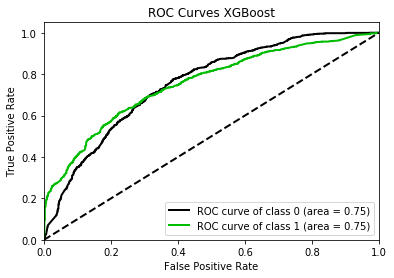

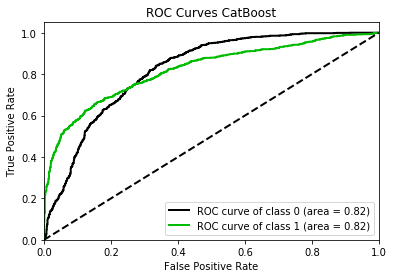

In [85]:
skplt.metrics.plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False, title = 'ROC Curves XGBoost')
skplt.metrics.plot_roc(y_test, y_predicted_cat, plot_micro=False, plot_macro=False, title = 'ROC Curves CatBoost');

### Resumen de este commit

Hasta ahora probamos:  
* Crear varias features derivadas del texto e incluimos la matriz de TF-IDF  
* BOW lo deje asi... vemos si lo borramos
* Por ahora eliminamos **keywords** y **location**  
* Podemos probar hacer algun analisis de keywords mas frecuentes o algo asi  
* De los tres modelos hasta ahora el mejor es CatBoost sin tunear  
* Probar con alguna red neuronal